## Background

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

### Problem Statement
What sorts of people were more likely to survive?

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Domain Analysis

survival:Survival(*0 = No, 1 = Yes*)

pclass:Ticket class(*1 = 1st, 2 = 2nd, 3 = 3rd*)

sex	:Sex

Age:Age in years

sibsp:# of siblings / spouses aboard the Titanic

parch:# of parents / children aboard the Titanic

ticket:Ticket number

fare:Passenger fare	

cabin:Cabin number	

embarked:Port of Embarkation(*C = Cherbourg, Q = Queenstown, S = Southampton*)

## Basic Checks

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Type of Features 
1.numerical feature:'PassengerId', 'Survived', 'Pclass','Age', 'SibSp','Parch','Fare'

2.categorical:'Name', 'Sex', 'Ticket','Cabin', 'Embarked'

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age and Cabin have missing values 

## Exploratory Data Analysis

### Type of Features 
1.numerical feature:'PassengerId', 'Survived','Age', 'SibSp','Parch','Fare', 'Cabin', 'Embarked'
ordinal: 'Pclass'

2.categorical feature:'Name', 'Sex', 'Ticket','Cabin', 'Embarked'

### Univariate Analysis

In [12]:
import sweetviz as sv
my_report = sv.analyze(train)## pass the original dataframe
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



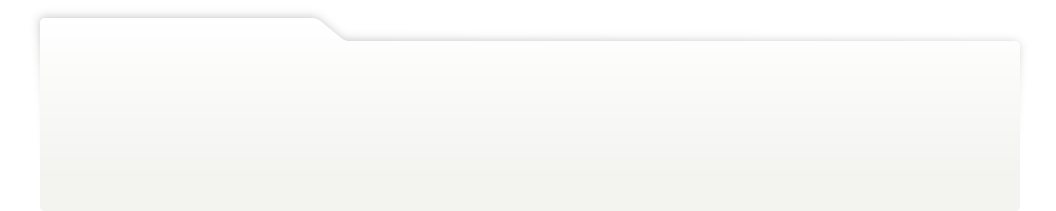
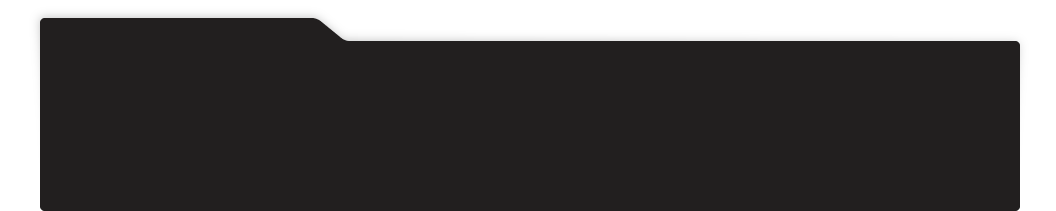
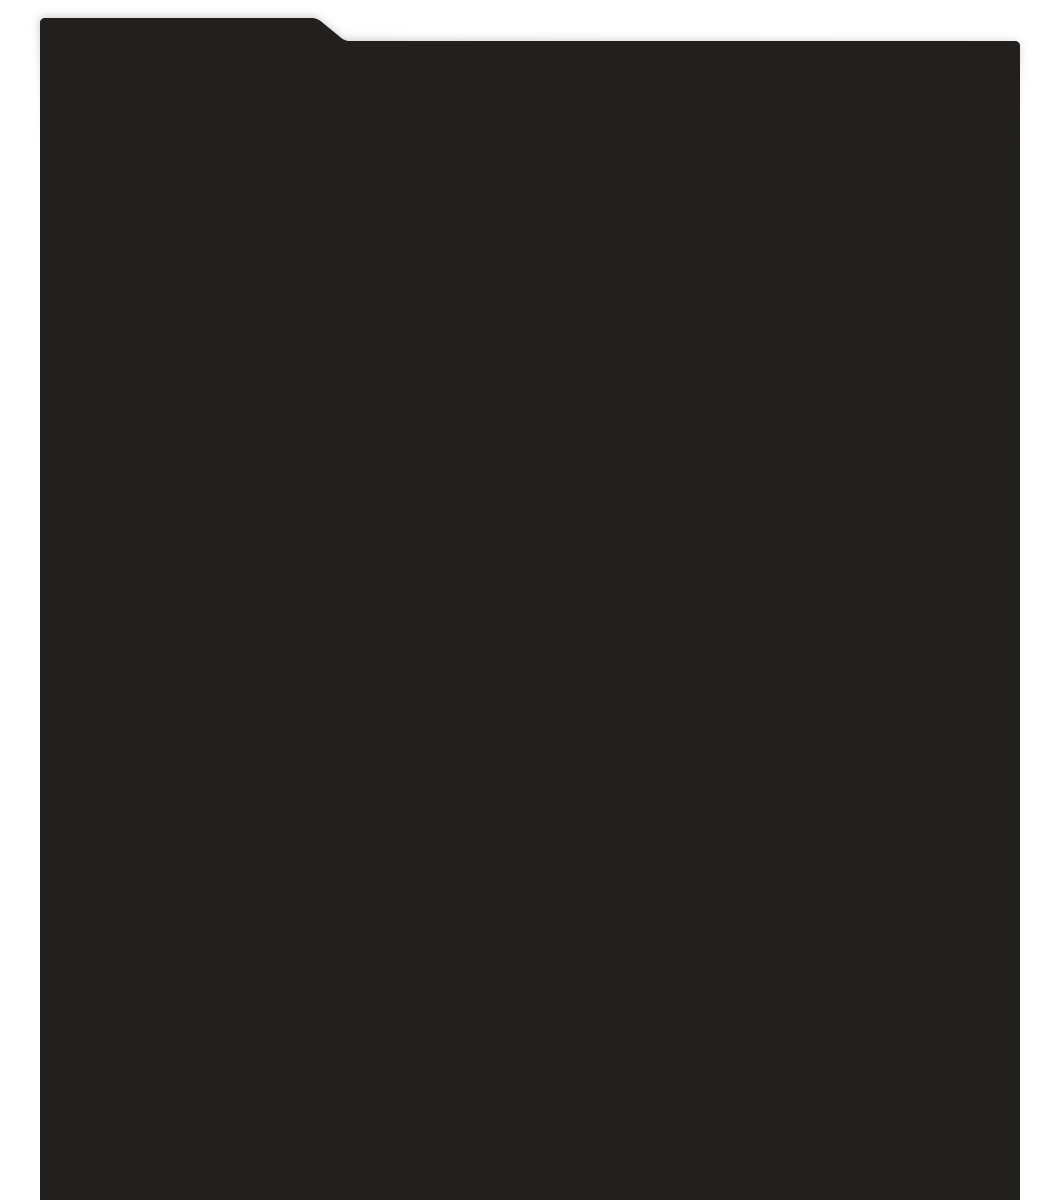
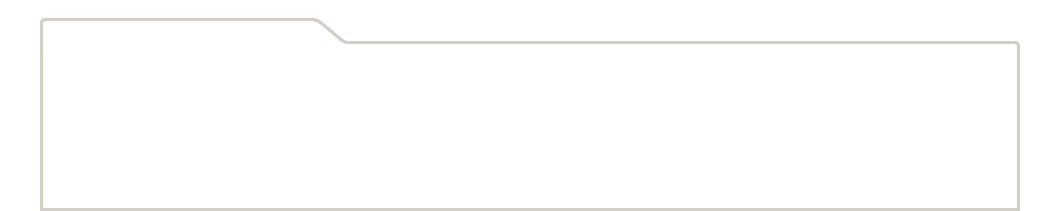
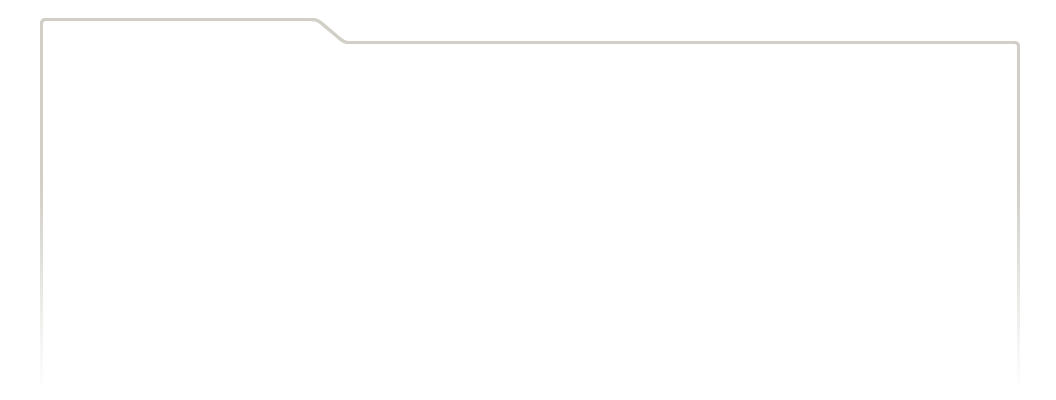
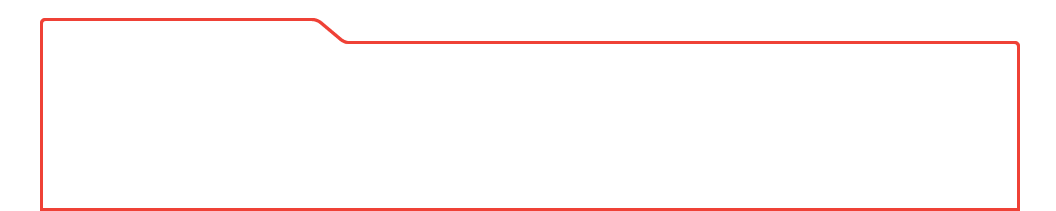
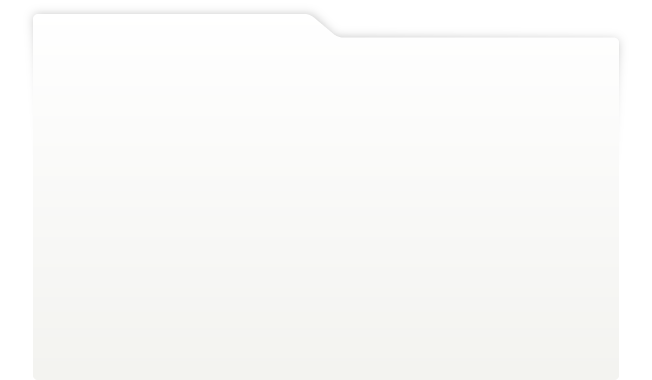
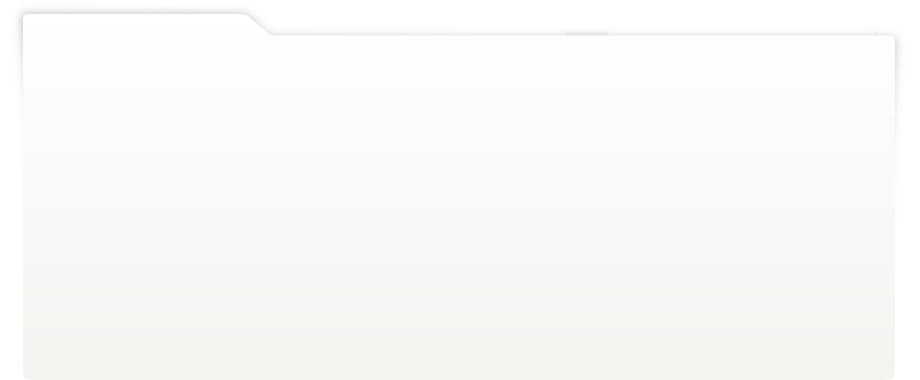
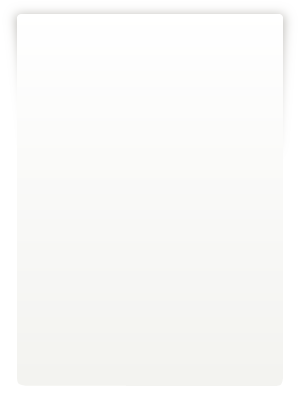
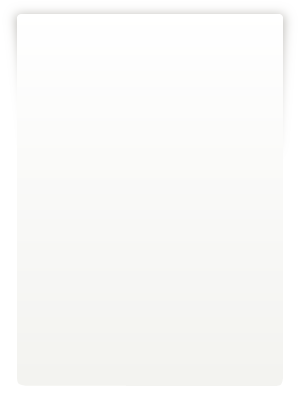
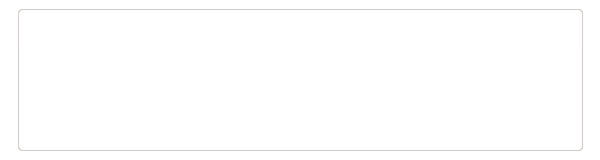
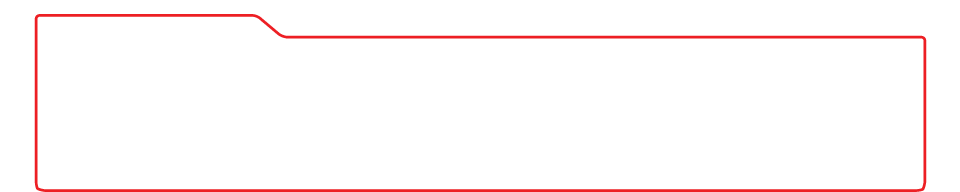
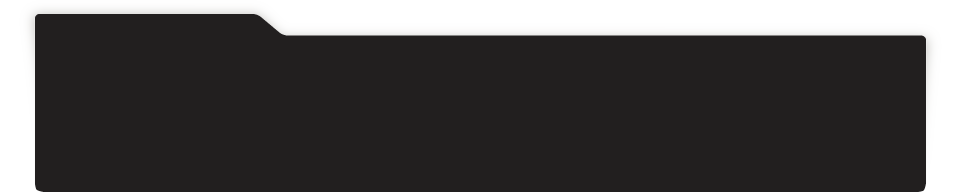
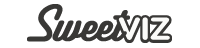
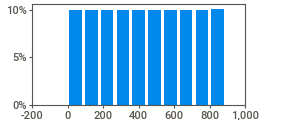
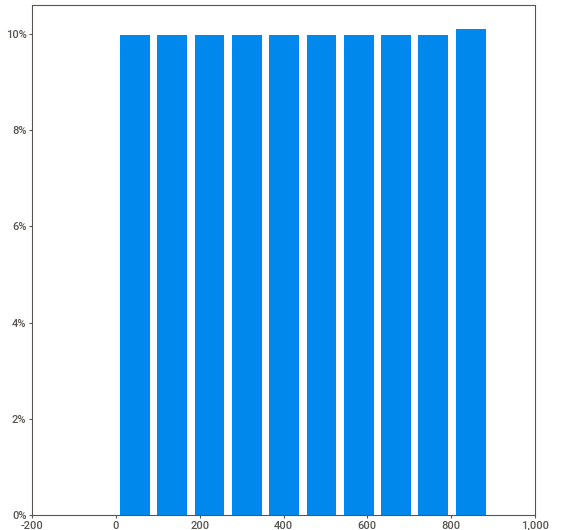
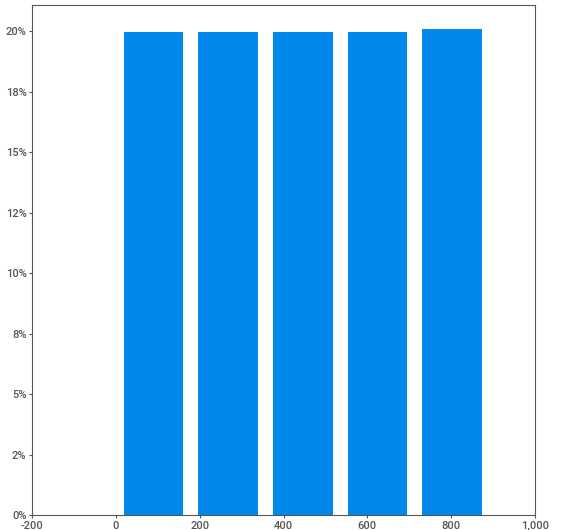
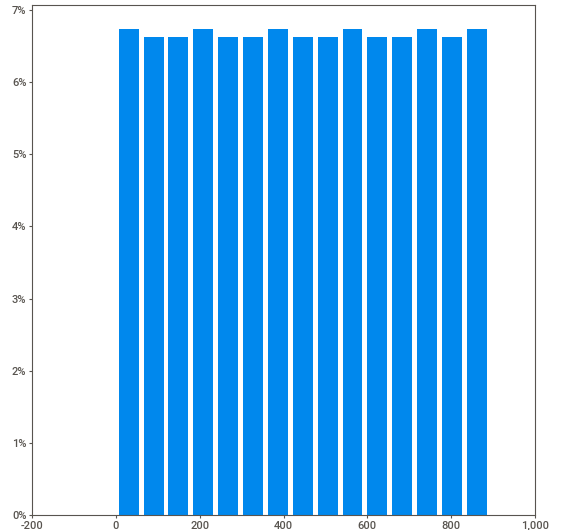
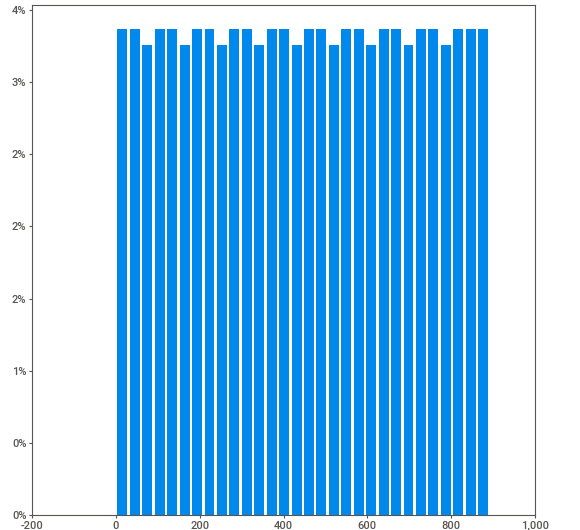
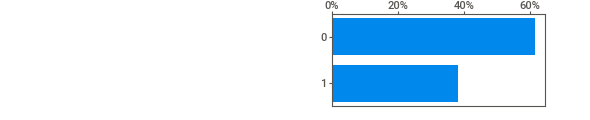
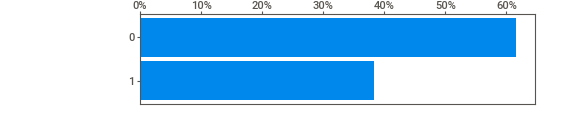
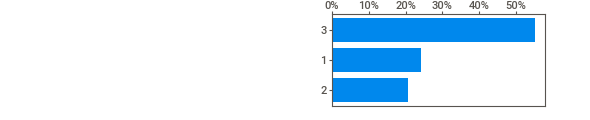
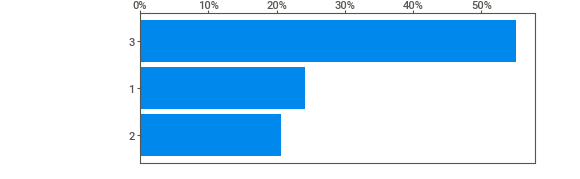
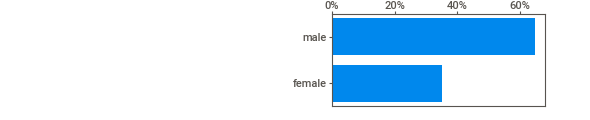
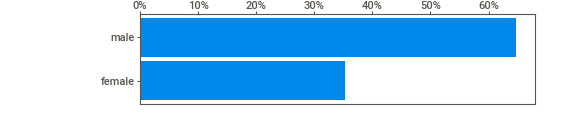
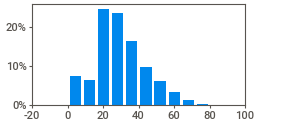
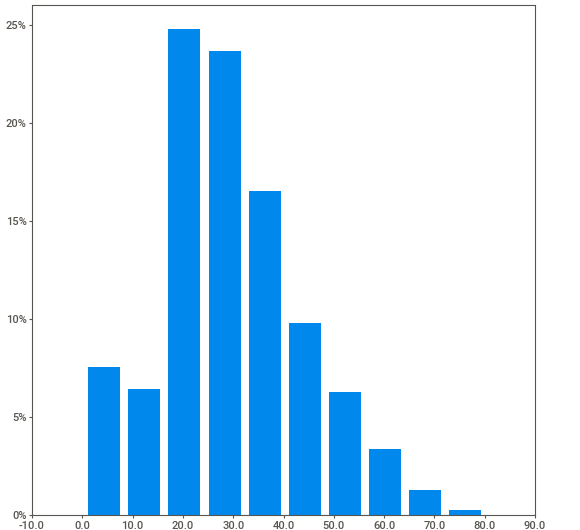
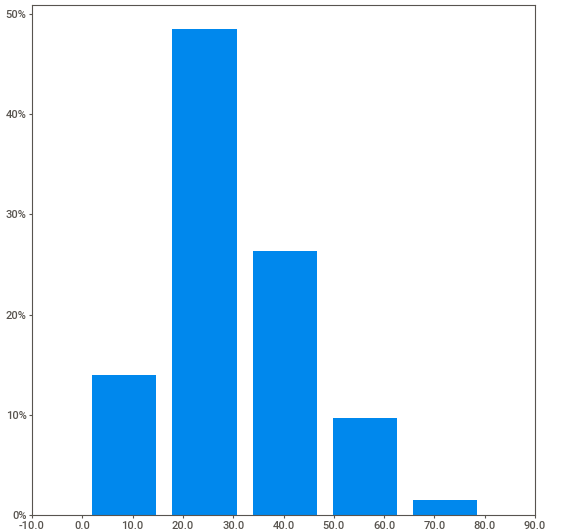
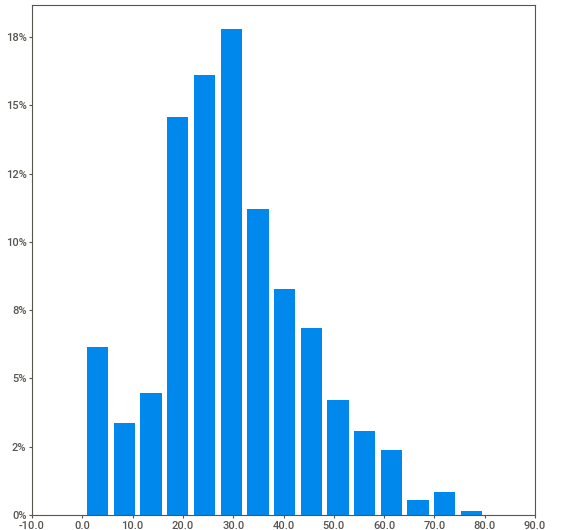
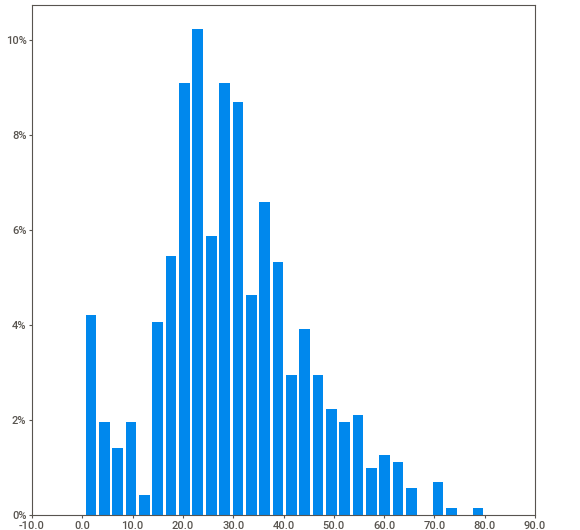
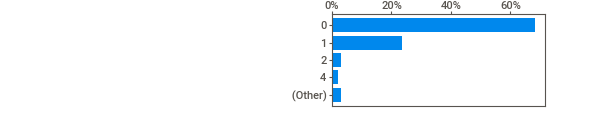
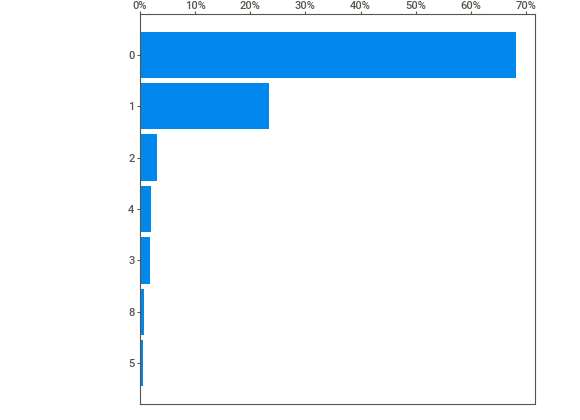
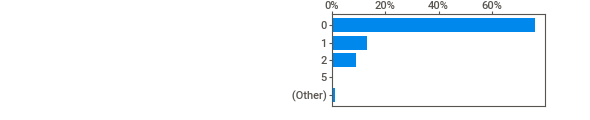
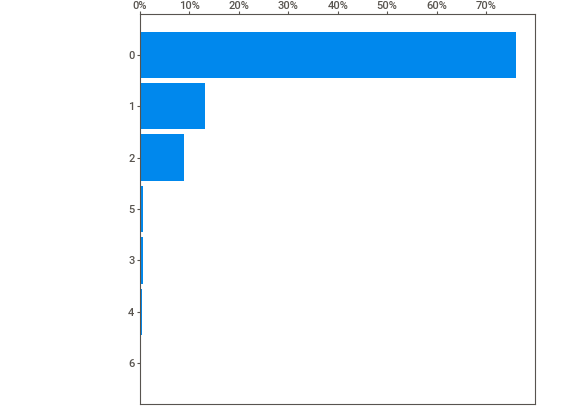
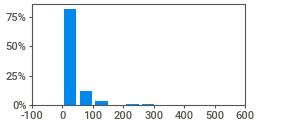
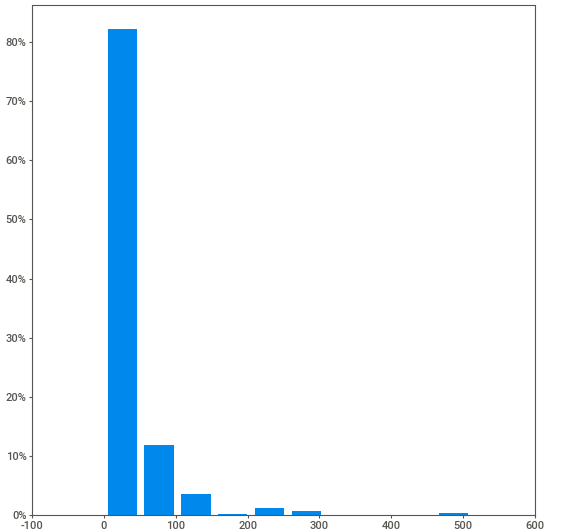
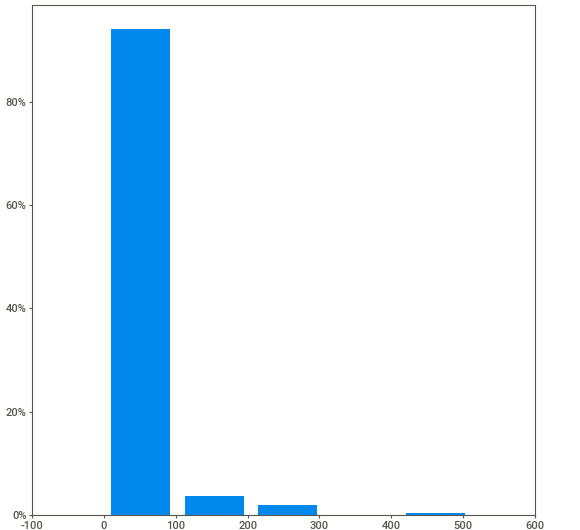
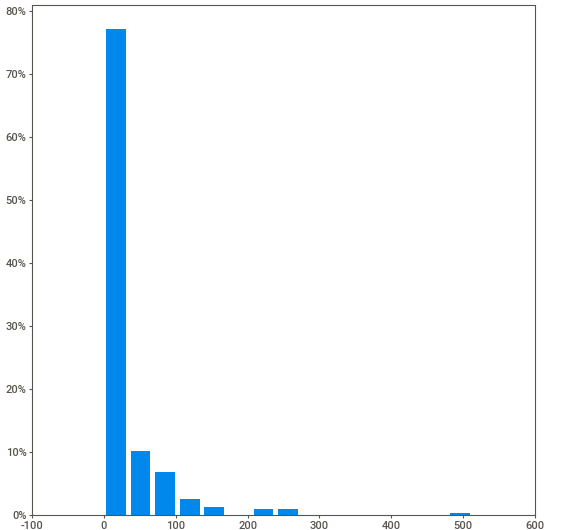
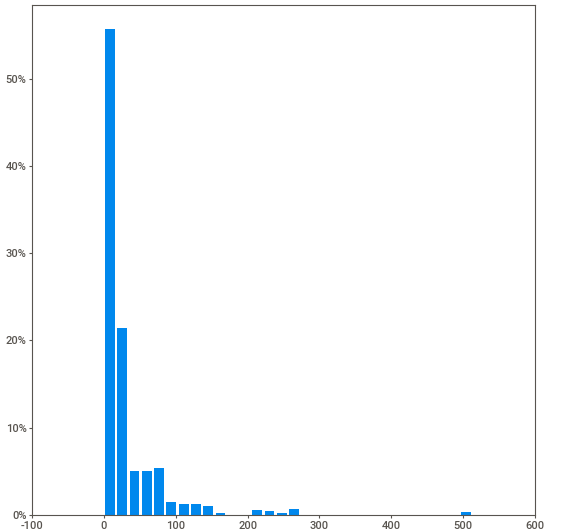
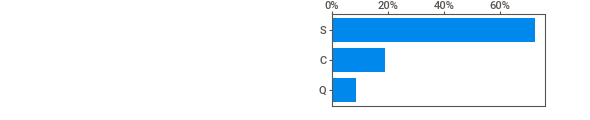
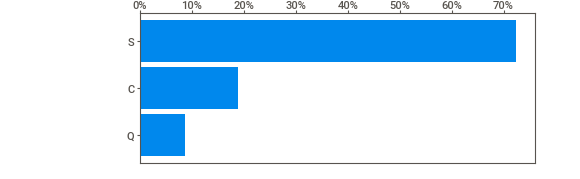
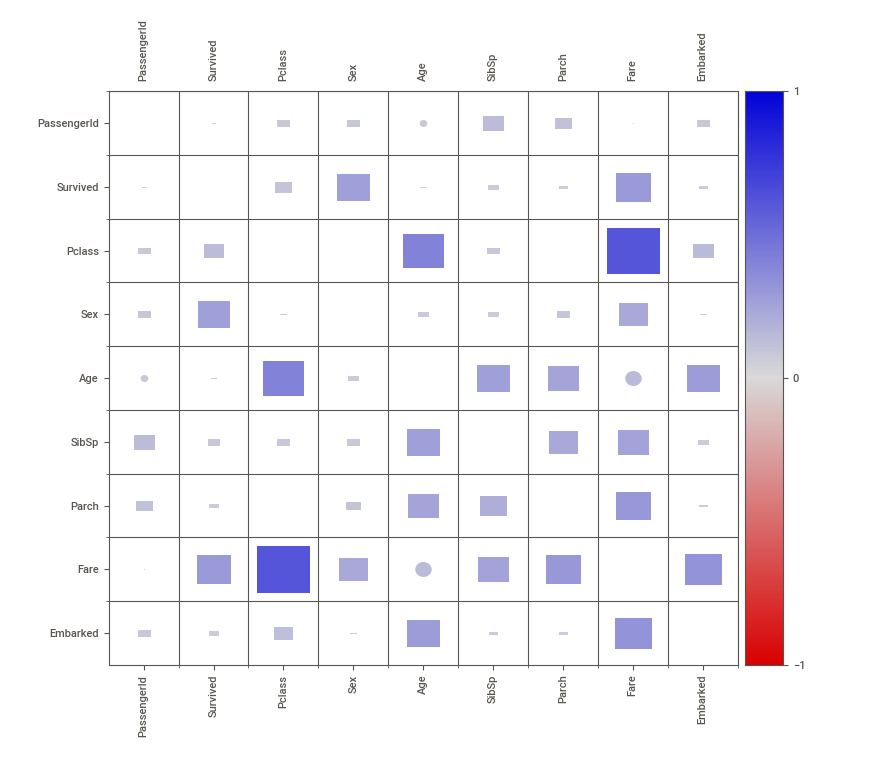
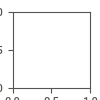

In [13]:
my_report.show_notebook()

#### We can know,

Nearly 60% passengers in sample did not survive. 3rd class had the most of passengers,whereas 2nd class was the least.Male passengers had more 20% than female passengers.More passengers did not have brought their spouses/siblings/parents/children.Cabin B96,B98,G6,C23,C25,C27 had more passengers.Passengers who embarked at S port had the highest amount.Tickets:347082,1601, CA. 2343  

### Bivariate or Multivariate Analysis

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
d1=train[['Survived', 'Pclass','Age', 'SibSp','Parch','Fare']]

C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

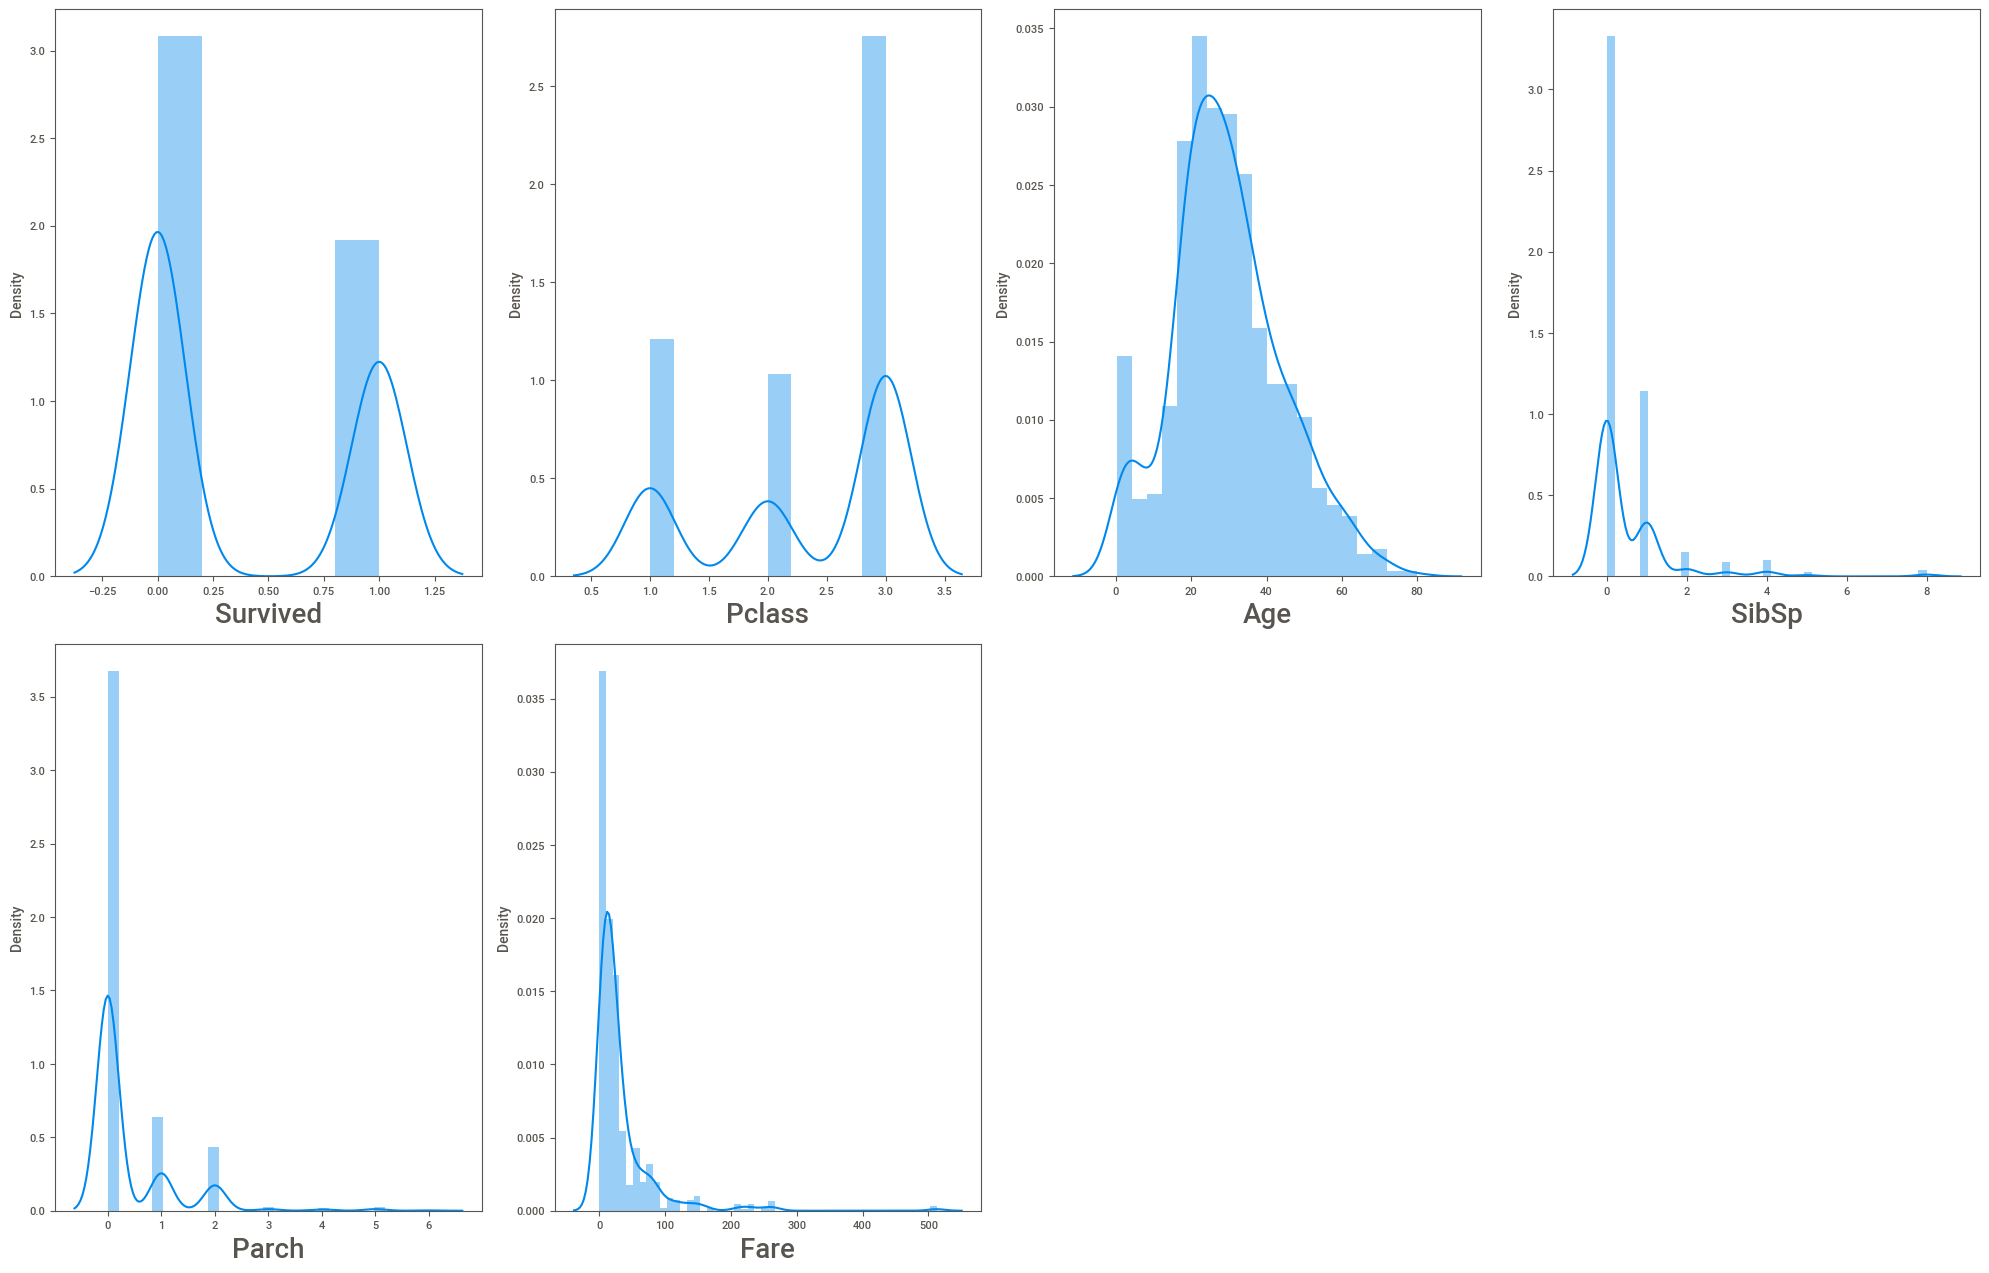

In [16]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in d1:
    if plotnumber<=16 :   ## as there is 16 columns
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x=d1[column].dropna(axis=0))
                        #,y=train.Loan_Status)
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Age is symmetrical

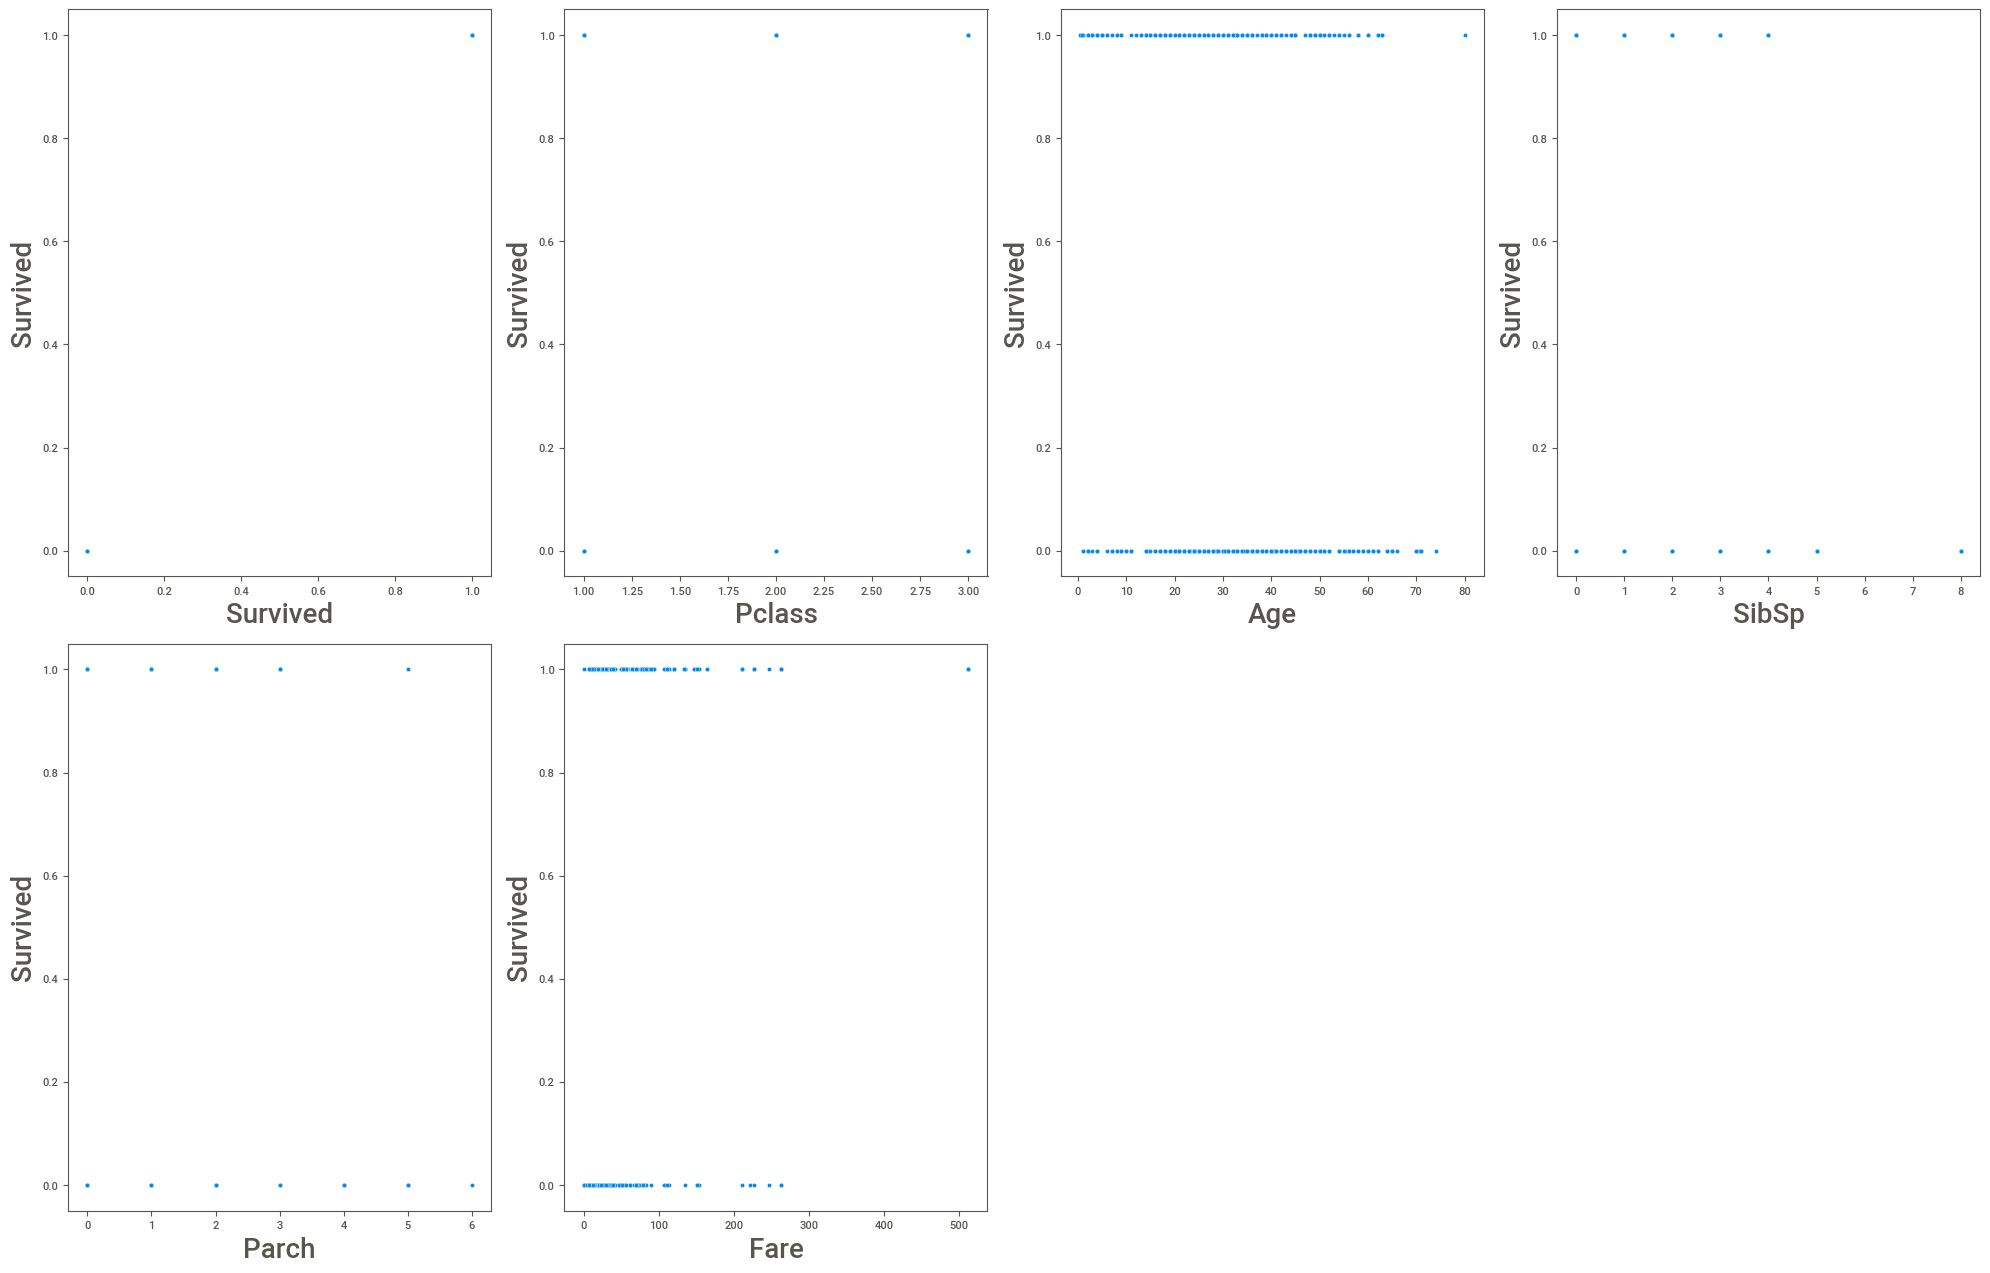

In [17]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in d1:
    if plotnumber<=16 :   ## as there is 16 columns
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=d1[column].dropna(axis=0)
                        ,y=train.Survived)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Survived',fontsize=20)
    plotnumber+=1
plt.tight_layout()


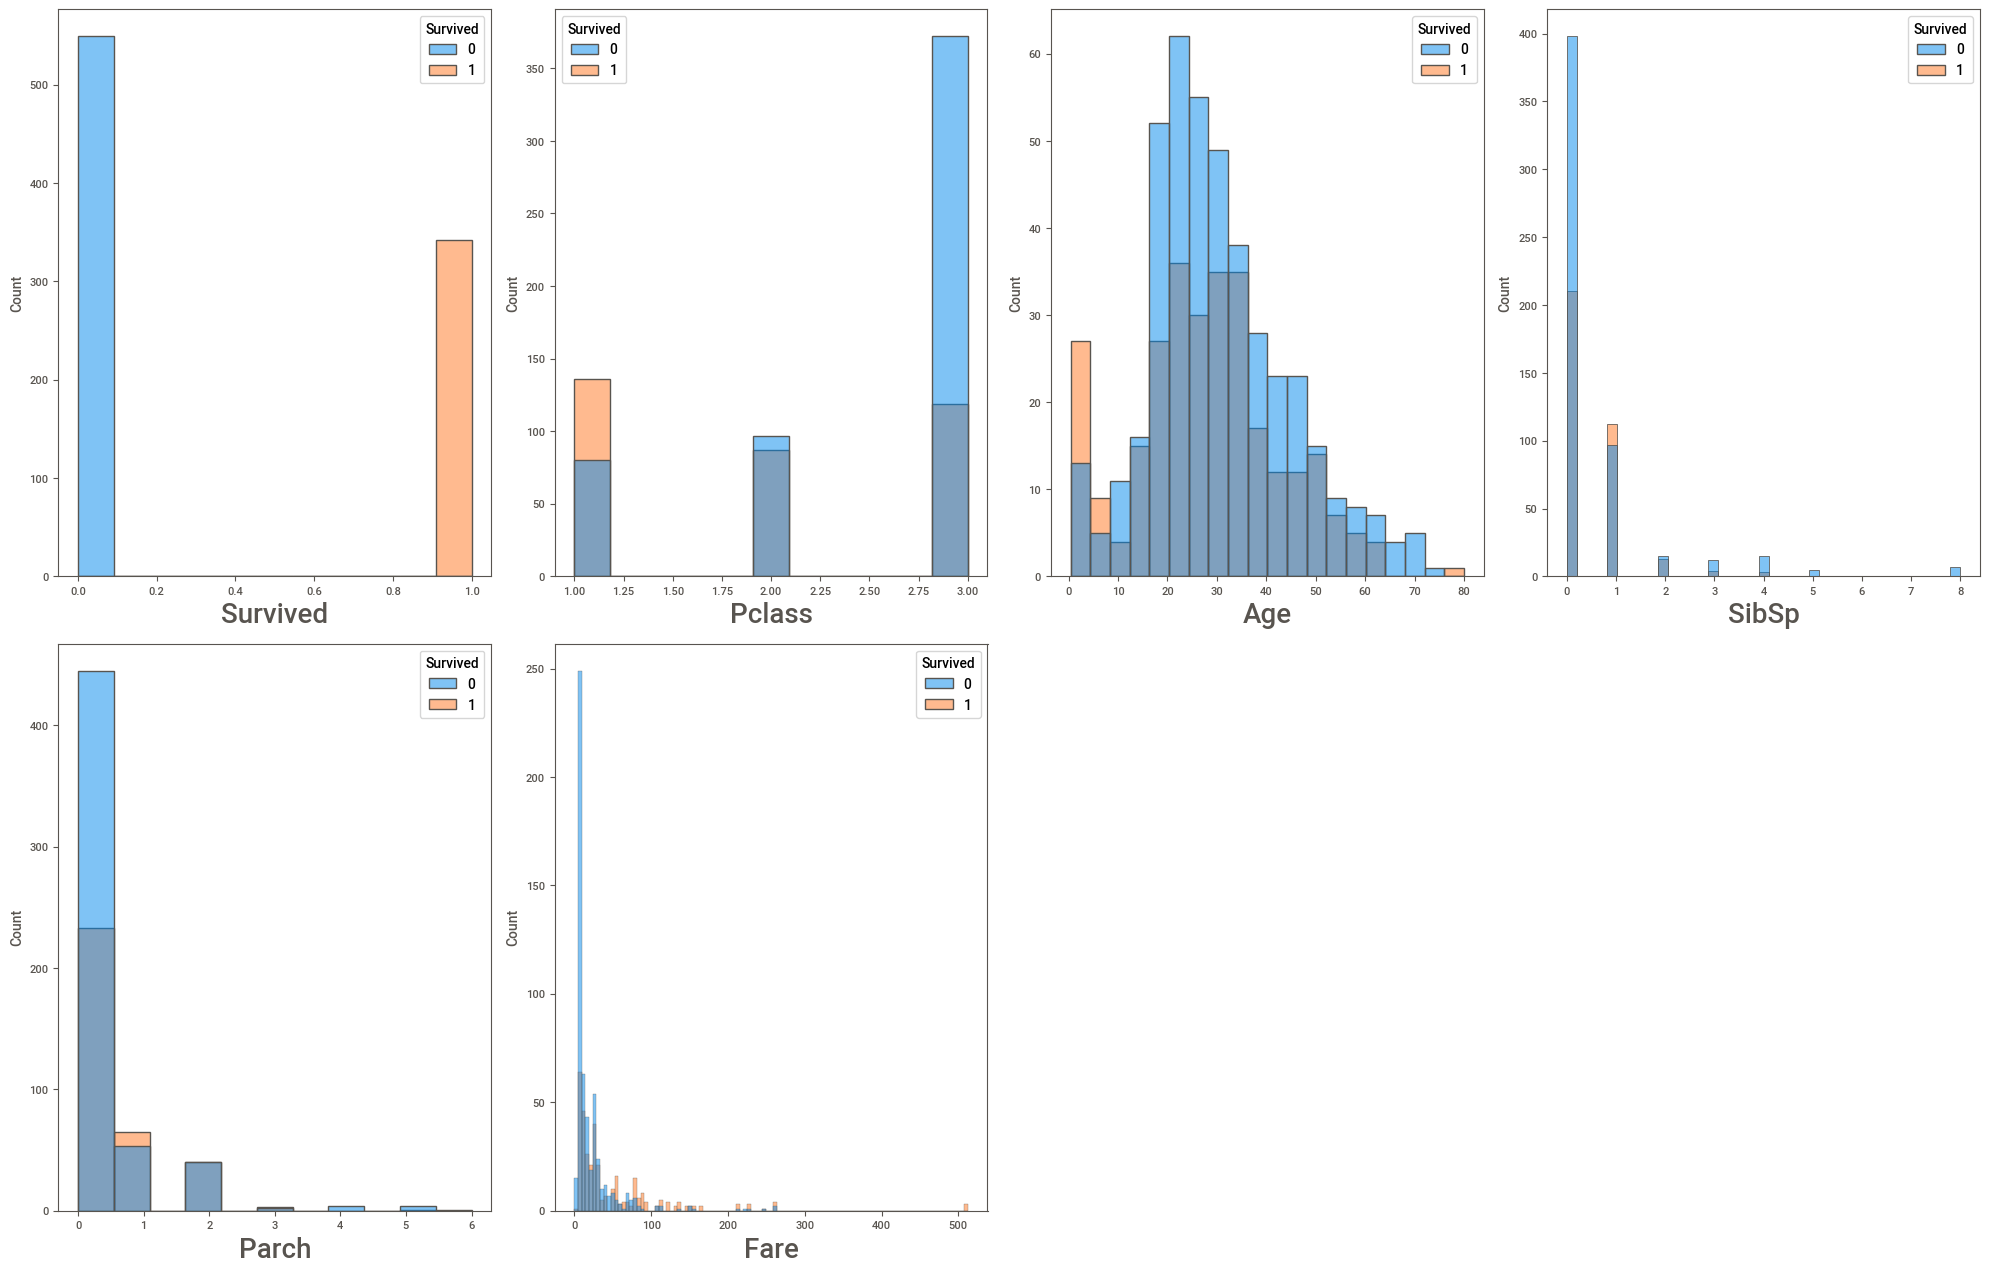

In [18]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in d1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=d1[column],hue=train.Survived)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can say,

Passengers had 1st ticket,children(<10 years old) and eldest(>75years old) higher survival rates.There had higher amount of passengers who did not brought companion had survived.Passengers who brought higher price ticket ,has better survival rates.



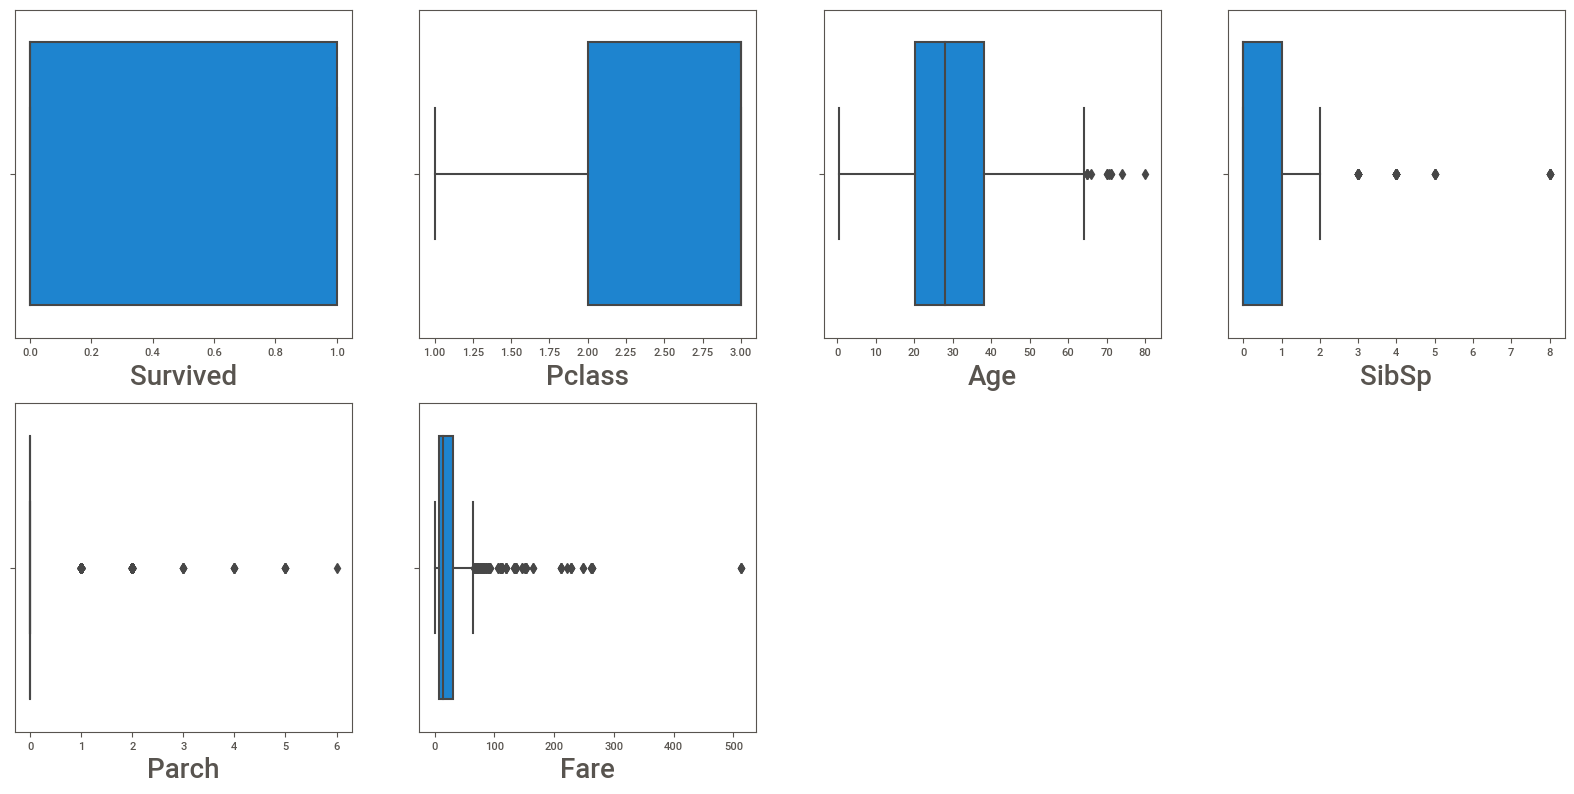

In [19]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in d1:
    if plotnumber<=16 :  
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=d1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

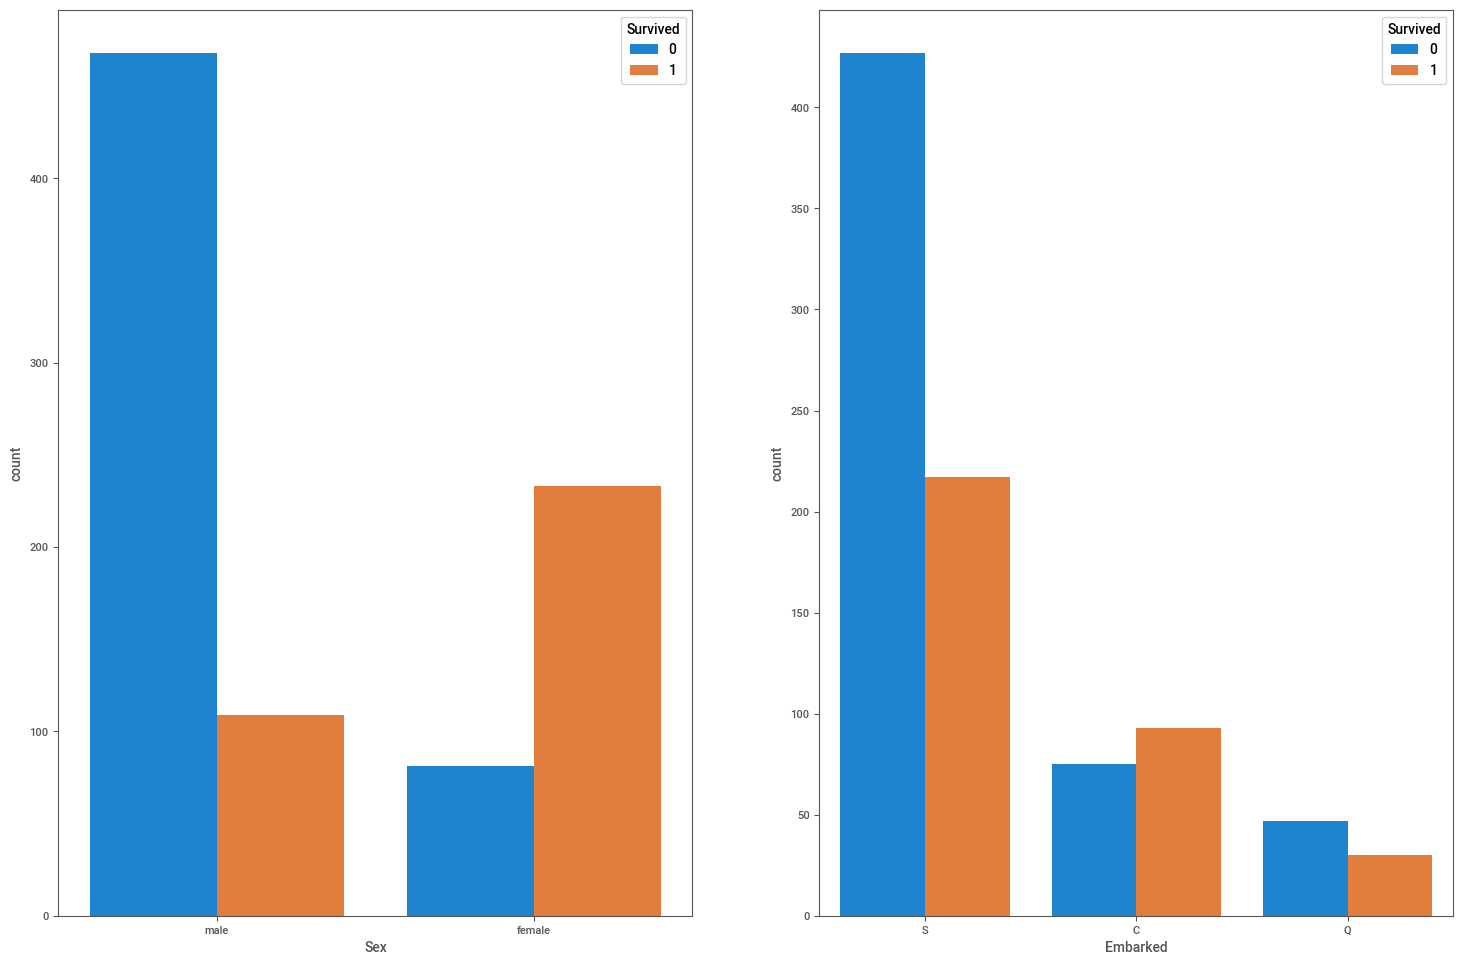

In [20]:
categorical= ['Sex', 'Embarked']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 12))
for col, ax in zip(categorical[0:], axs.ravel()):
    sns.countplot(x=col, data=train, ax=ax,hue=train.Survived)

There had more female survivors.
The highest survival rate was passengers who embarked at S ports,meanwhile,Q-ports had the least.

In [21]:
train.Ticket.value_counts()

1601         7
347082       7
CA. 2343     7
CA 2144      6
347088       6
            ..
349239       1
2626         1
W/C 14208    1
4135         1
244361       1
Name: Ticket, Length: 681, dtype: int64

In [22]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
C22 C26        3
              ..
B102           1
A16            1
D48            1
A7             1
D49            1
Name: Cabin, Length: 147, dtype: int64

## Data Preprocessing 

In [23]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
## Getting the rows where values are missed in Gender features
train.loc[train['Embarked'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [26]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
train.Name.unique

<bound method Series.unique of 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object>

##### Train

1.numerical feature:'PassengerId', 'Survived','Age', 'SibSp','Parch','Fare', 'Cabin', 'Embarked'
ordinal: 'Pclass'

2.categorical feature:'Name', 'Sex', 'Ticket','Cabin', 'Embarked'

In [28]:
#Impute  numerical with median
train['Age']  = train['Age'].fillna(train['Age'].median())


In [29]:
#Impute categorical
train.loc[train['Embarked'].isnull()==True,'Embarked']='S'

In [30]:
#categorical->numerical
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
train.Sex=lc.fit_transform(train.Sex)
train.Embarked=lc.fit_transform(train.Embarked)

In [31]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


##### Test

In [32]:
#Impute  numerical with median
test['Age']  = test['Age'].fillna(test['Age'].median())

In [33]:
#categorical->numerical
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
test.Sex=lc.fit_transform(test.Sex)
test.Embarked=lc.fit_transform(test.Embarked)

In [34]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27.0,0,0,A.5. 3236,8.0500,NaN,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2
416,1308,3,"Ware, Mr. Frederick",1,27.0,0,0,359309,8.0500,NaN,2


## Feature Selection

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.7+ KB


In [36]:
train1=train.drop(['PassengerId','Name','Cabin','Ticket'],axis=1) ## Droping unique attribute
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [37]:
test1=train.drop(['PassengerId','Name','Cabin','Ticket'],axis=1) ## Droping unique attribute
test1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


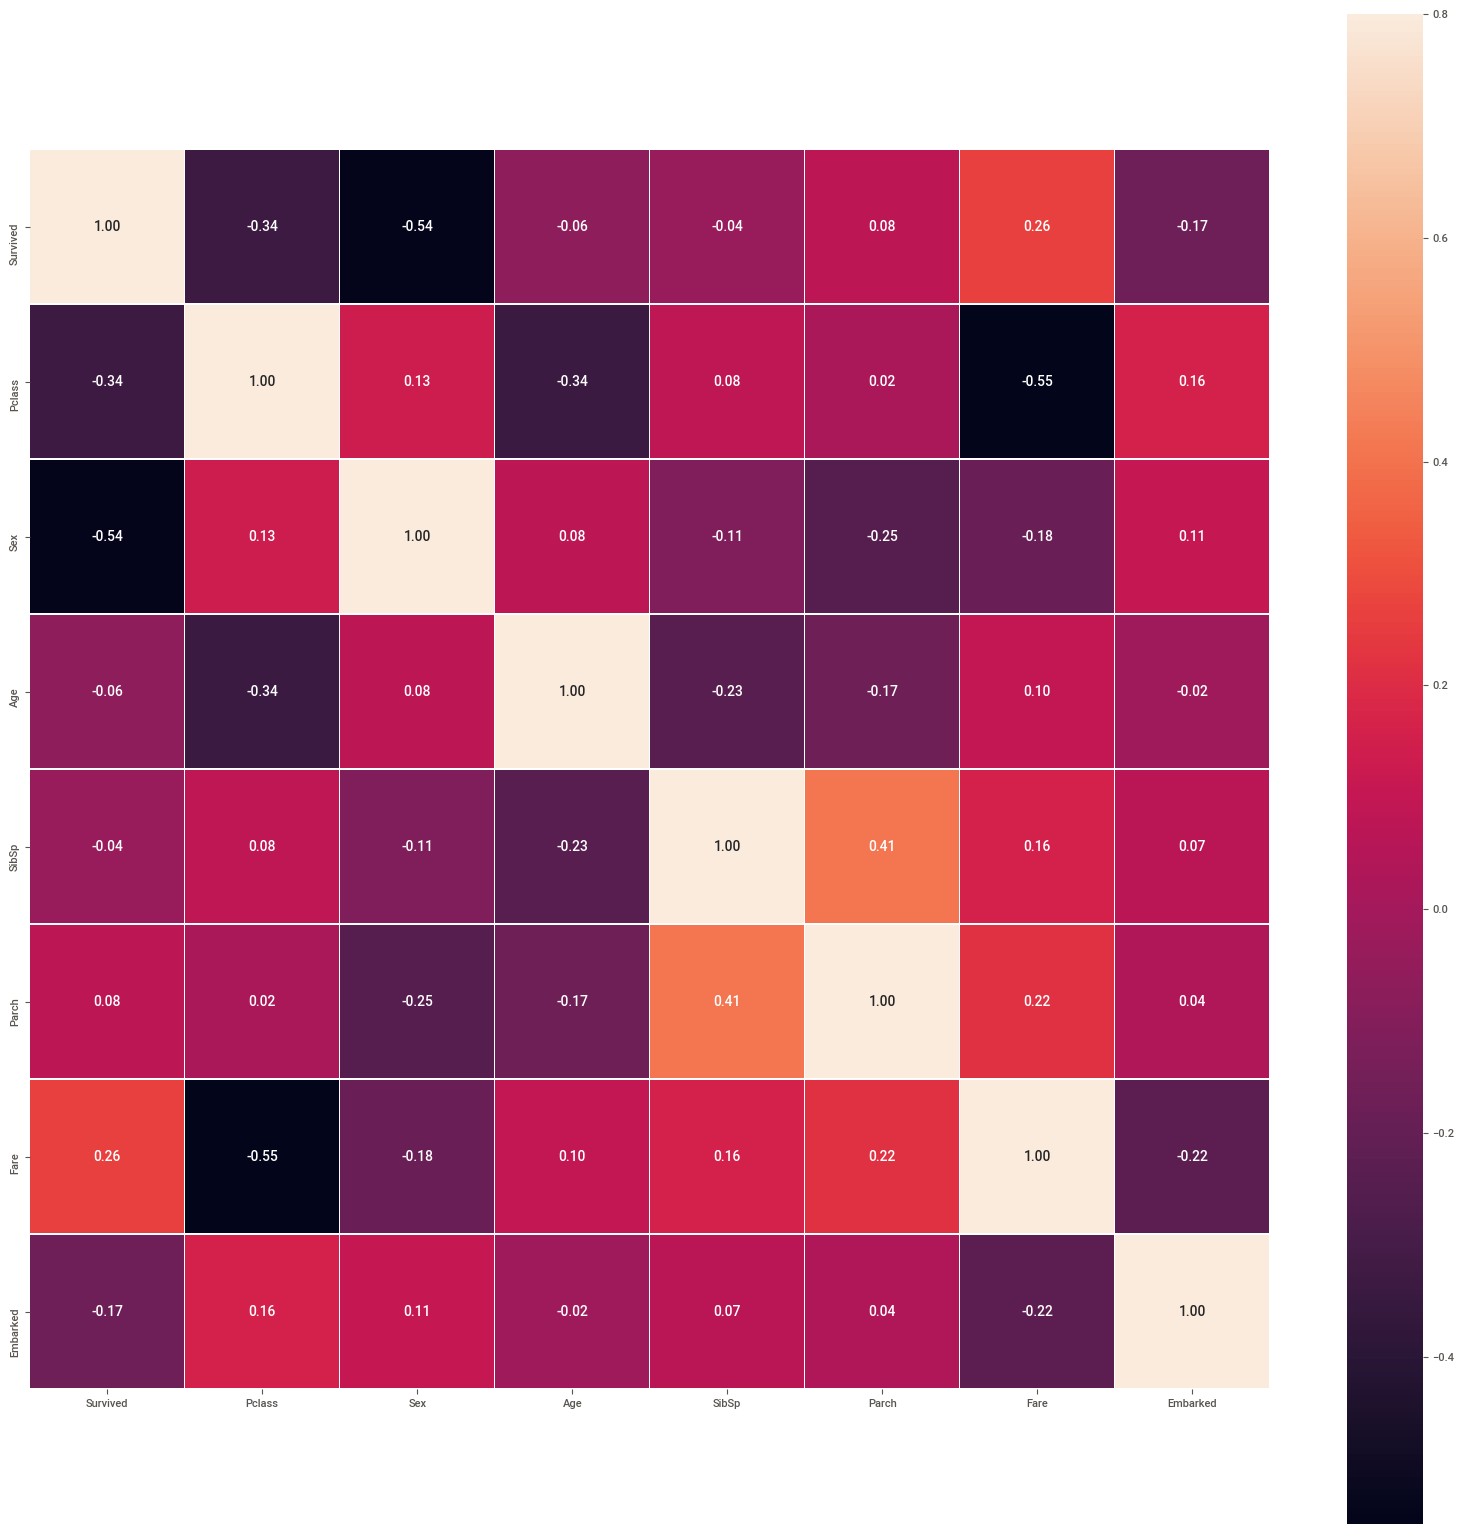

In [38]:
#check correlation
plt.figure(figsize=(20, 20))
ax = sns.heatmap(train1.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)

In [39]:
train1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [40]:
train.duplicated().sum()

0

In [41]:
test.duplicated().sum()

0

## Model Creation

In [42]:
X = train1.drop(columns = ['Survived']) ## independent variable
y = train1['Survived'] ## Dependent or target variable"

In [43]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()## objet creation
X_scaled = scalar.fit_transform(X)

In [44]:
## Balacing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(X_scaled,y)
print(Counter(y_sm))

Counter({0: 549, 1: 342})
Counter({0: 549, 1: 549})


In [45]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_sm,y_sm, test_size= 0.3,random_state=0)

### The following models will be built :
* Logistic Regression
* KNN 
* Decision Tree
* Random Forest 
* XGBoost
* Naive Bayes
* SVM
* ANN
* Gradient Boosting

## Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression
modellr = LogisticRegression()## object Creation

modellr.fit(x_train,y_train)## fitting the model with training data

LogisticRegression()

In [47]:
y_predlr = modellr.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_predlr))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       163
           1       0.80      0.73      0.76       167

    accuracy                           0.77       330
   macro avg       0.77      0.77      0.77       330
weighted avg       0.78      0.77      0.77       330



In [49]:
y_pred_trainlr=modellr.predict(x_train)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_trainlr))
print("Test accuracy :",accuracy_score(y_test,y_predlr))

Train accuracy : 0.7890625
Test accuracy : 0.7727272727272727


In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modellr,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.84611331 0.83168449 0.85100267 0.84458556 0.87328813]
Cross validation Score: 0.8493348321669025
Std : 0.013572106056596504


C:\Users\Emmal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNN Model

In [52]:
### creating 2nd model
from sklearn.neighbors import KNeighborsClassifier
modelknn= KNeighborsClassifier()
modelknn.fit(x_train,y_train)
y_hatknn=modelknn.predict(x_test)

In [53]:
## for KNN model
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_hatknn)
score

0.7966827082032254

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelknn,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.64156785 0.7        0.72713904 0.77727273 0.7760936 ]
Cross validation Score: 0.724414644343432
Std : 0.05085622865824884


In [55]:
error_rate=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

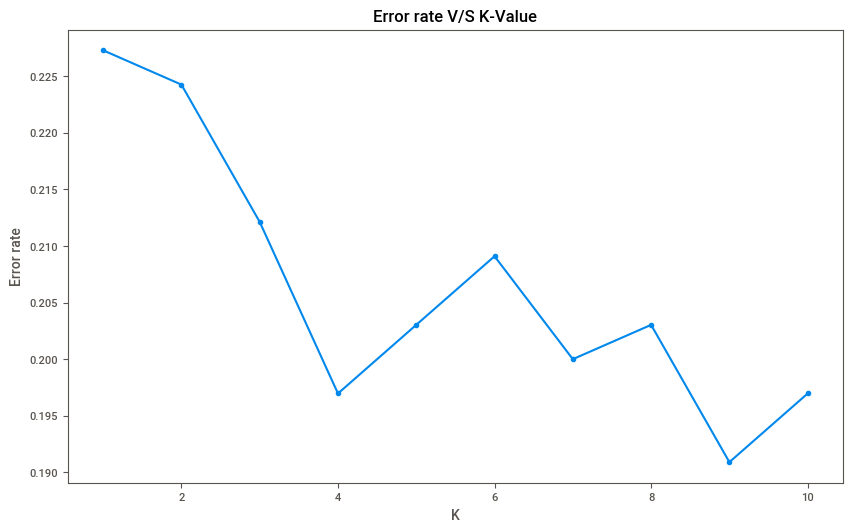

In [56]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,marker='o')
plt.title('Error rate V/S K-Value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [57]:
knn1=KNeighborsClassifier(n_neighbors=8)
knn1.fit(x_train,y_train)
y_hatknn1=knn1.predict(x_test)

In [58]:
print(classification_report(y_test,y_hatknn1))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       163
           1       0.82      0.77      0.79       167

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



In [59]:
y_pred_trainknn=knn1.predict(x_train)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_trainknn))
print("Test accuracy :",accuracy_score(y_test,y_hatknn1))

Train accuracy : 0.8567708333333334
Test accuracy : 0.796969696969697


## Decision Tree Model

In [61]:
from sklearn.tree import DecisionTreeClassifier
modeldt=DecisionTreeClassifier()
modeldt.fit(x_train,y_train)
y_hatdt=modeldt.predict(x_test)

In [62]:
print(classification_report(y_test,y_hatdt))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       163
           1       0.79      0.78      0.79       167

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.78      0.78      0.78       330



In [63]:
y_pred_traindt=modeldt.predict(x_train)

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_traindt))
print("Test accuracy :",accuracy_score(y_test,y_hatdt))

Train accuracy : 0.9869791666666666
Test accuracy : 0.7848484848484848


In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modeldt,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.72779974 0.7592246  0.81824866 0.7065508  0.83027523]
Cross validation Score: 0.7684198060048619
Std : 0.04872642797739876


In [66]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}



modeldt1 = DecisionTreeClassifier(random_state=3)# createempty model

modeldt1_cv = RandomizedSearchCV(modeldt1,params,scoring='f1', n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#n_iter-->100 times to buld  new model
modeldt1_cv.fit(x_train, y_train)
modeldt1_best_params = modeldt1_cv.best_params_
print(f"Best paramters: {modeldt1_best_params}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 11, 'max_depth': 6, 'criterion': 'entropy'}


In [67]:
modeldt2=DecisionTreeClassifier(criterion='entropy',max_depth=4,
                                min_samples_leaf=5,min_samples_split=3,
                                splitter='best')

In [68]:
modeldt2.fit(x_train,y_train)
y_hatdt2=modeldt2.predict(x_test)   

In [69]:
print(classification_report(y_test,y_hatdt2))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       163
           1       0.77      0.84      0.81       167

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



In [70]:
y_pred_traindt2=modeldt2.predict(x_train)

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_traindt2))
print("Test accuracy :",accuracy_score(y_test,y_hatdt2))

Train accuracy : 0.82421875
Test accuracy : 0.796969696969697


## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

modelrf = RandomForestClassifier(n_estimators=100)
modelrf.fit(x_train,y_train)
y_predrf=modelrf.predict(x_test)


In [73]:
pd.crosstab(y_test,y_predrf)

col_0,0,1
Survived,,
0,131,32
1,26,141


In [74]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       163
           1       0.82      0.84      0.83       167

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



In [75]:
y_pred_trainrf=modelrf.predict(x_train)

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_trainrf))
print("Test accuracy :",accuracy_score(y_test,y_predrf))

Train accuracy : 0.9869791666666666
Test accuracy : 0.8242424242424242


In [77]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelrf,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.82582345 0.80942513 0.90467914 0.84391711 0.89157027]
Cross validation Score: 0.8550830224391313
Std : 0.037031168930927595


#### Hyperparameter Tuning 

In [78]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]#optimal value
min_samples_leaf = [1,2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

modelrf1 = RandomForestClassifier(random_state=42)# createempty model

modelrf1_cv = RandomizedSearchCV(estimator=modelrf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#n_iter-->100 times to buld  new model
modelrf1_cv.fit(x_train, y_train)
modelrf1_best_params = modelrf1_cv.best_params_
print(f"Best paramters: {modelrf1_best_params}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}


In [79]:
modelrf2 = RandomForestClassifier(n_estimators=800,min_samples_split=2,min_samples_leaf=2,max_features='sqrt', 
                                  max_depth=50,bootstrap=False)

In [80]:
modelrf2.fit(x_train, y_train)
y_predrf2=modelrf2.predict(x_test)

In [81]:
y_pred_trainrf2=modelrf2.predict(x_train)

In [82]:
print(classification_report(y_test,y_predrf2))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       163
           1       0.85      0.80      0.82       167

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_trainrf2))
print("Test accuracy :",accuracy_score(y_test,y_predrf2))

Train accuracy : 0.9427083333333334
Test accuracy : 0.8272727272727273


## XGB model

In [84]:
from xgboost import XGBClassifier
modelxgb=XGBClassifier(n_estimators=50,max_depth=4)
modelxgb.fit(x_train,y_train)
y_hatxgb=modelxgb.predict(x_test)

[20:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Emmal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [85]:
print(classification_report(y_test,y_hatxgb))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       163
           1       0.84      0.80      0.82       167

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



In [86]:
y_pred_trainxgb=modelxgb.predict(x_train)

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_trainxgb))
print("Test accuracy :",accuracy_score(y_test,y_hatxgb))

Train accuracy : 0.9322916666666666
Test accuracy : 0.8181818181818182


In [88]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelxgb,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[20:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Emmal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Emmal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Emmal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Emmal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.85428195 0.81691176 0.90120321 0.8631016  0.90360324]
Cross validation Score: 0.8678203543447334
Std : 0.03222443067123579


C:\Users\Emmal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## Naive Bayes Model

In [89]:
from sklearn.naive_bayes import GaussianNB
modelnb=GaussianNB(var_smoothing=0.01)
modelnb.fit(x_train,y_train)
y_prednb=modelnb.predict(x_test)

In [90]:
print(classification_report(y_test,y_prednb))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       163
           1       0.81      0.72      0.76       167

    accuracy                           0.77       330
   macro avg       0.77      0.77      0.77       330
weighted avg       0.77      0.77      0.77       330



In [91]:
y_pred_trainnb=modelnb.predict(x_train)

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_trainnb))
print("Test accuracy :",accuracy_score(y_test,y_prednb))

Train accuracy : 0.7721354166666666
Test accuracy : 0.7696969696969697


In [93]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelnb,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.55283267 0.69946524 0.64084225 0.75701872 0.73580641]
Cross validation Score: 0.677193057300521
Std : 0.07360787630423413


## SVM Model

In [94]:
from sklearn.svm import SVC
modelsvc=SVC()
modelsvc.fit(x_train,y_train)
y_predsvc=modelsvc.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
print(classification_report(y_test,y_predsvc))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       163
           1       0.82      0.77      0.79       167

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



In [96]:
y_pred_trainsvc=modelsvc.predict(x_train)

In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_trainsvc))
print("Test accuracy :",accuracy_score(y_test,y_predsvc))

Train accuracy : 0.8229166666666666
Test accuracy : 0.796969696969697


In [98]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_predsvc)
score

0.7972704896954558

In [99]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelsvc,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.59407115 0.75989305 0.76316845 0.80514706 0.77436511]
Cross validation Score: 0.7393289626834525
Std : 0.07436476239973258


## Artificial Neural Networks 

In [101]:

from sklearn.neural_network import MLPClassifier

                      
modelann = MLPClassifier(hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2) ## model object creation max_iter=Stopping parameter
modelann.fit(x_train,y_train) ## training the data
y_predann = modelann.predict_proba(x_test) ## predicting the probability
## probability of class
y_hatann= modelann.predict(x_test)
y_pred_trainann = modelann.predict(x_train)


In [102]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_trainann))
print("Test accuracy :",accuracy_score(y_test,y_hatann))

Train accuracy : 0.8307291666666666
Test accuracy : 0.803030303030303


In [103]:
## getting classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hatann))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       163
           1       0.78      0.84      0.81       167

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



## Gradiant Boosting Classifier Model

In [104]:

from sklearn.ensemble import GradientBoostingClassifier
modelgbm=GradientBoostingClassifier() ## object creation
modelgbm.fit(x_train,y_train) ## fitting the data
y_predgbm=modelgbm.predict(x_test)

In [105]:
GradientBoostingClassifier?

In [106]:
print(classification_report(y_test,y_predgbm))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       163
           1       0.84      0.78      0.81       167

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



In [107]:
y_pred_traingbm=modelgbm.predict(x_train)

In [108]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_traingbm))
print("Test accuracy :",accuracy_score(y_test,y_predgbm))

Train accuracy : 0.90234375
Test accuracy : 0.8151515151515152


In [109]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_predgbm)
score

0.8155284522978583

In [110]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelgbm,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.8571805  0.81604278 0.90748663 0.85147059 0.91111554]
Cross validation Score: 0.868659208760924
Std : 0.03607161476956875


In [111]:
models = pd.DataFrame({
    'Model': ['modellr', 'knn1', 'modeldt2', 
              'modelrf2', 'modelxgb', 'modelnb', 
              'modelsvc', 'modelann', 
              'modelgbm'],
    'Score': [accuracy_score(y_test,y_predlr),accuracy_score(y_test,y_hatknn1),accuracy_score(y_test,y_hatdt2), 
              accuracy_score(y_test,y_predrf2),accuracy_score(y_test,y_hatxgb), accuracy_score(y_test,y_prednb), 
             accuracy_score(y_test,y_predsvc), accuracy_score(y_test,y_hatann), accuracy_score(y_test,y_predgbm)]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,modelrf2,0.827273
4,modelxgb,0.818182
8,modelgbm,0.815152
7,modelann,0.803030
1,knn1,0.796970
2,modeldt2,0.796970
6,modelsvc,0.796970
0,modellr,0.772727
5,modelnb,0.769697
